### IMPORTING LIBRARIES###

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
import datetime
from nltk.corpus import stopwords
from datetime import date, timedelta
%matplotlib inline


#### READING DATA

In [33]:
us_vid = pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [13]:
print(us_vid.shape)
print(us_vid.nunique())

(7992, 11)
video_id          2364
title             2398
channel_title     1230
category_id         16
tags              2204
views             7939
likes             6624
dislikes          2531
comment_total     4152
thumbnail_link    2364
date                40
dtype: int64


In [32]:
us_vid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 10 columns):
video_id         7992 non-null object
title            7992 non-null object
channel_title    7992 non-null object
category_id      7992 non-null int64
tags             7992 non-null object
views            7992 non-null int64
likes            7992 non-null int64
dislikes         7992 non-null int64
comment_total    7992 non-null int64
date             7992 non-null object
dtypes: int64(5), object(5)
memory usage: 468.3+ KB


In [21]:
us_vid = us_vid.drop('thumbnail_link', 1)

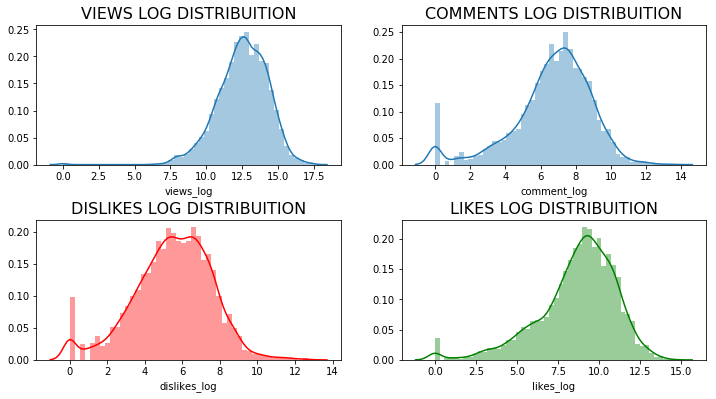

In [43]:
us_vid['likes_log'] = np.log(us_vid['likes'] + 1)
us_vid['views_log'] = np.log(us_vid['views'] + 1)
us_vid['dislikes_log'] = np.log(us_vid['dislikes'] + 1)
us_vid['comment_log'] = np.log(us_vid['comment_total'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(us_vid['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(us_vid['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(us_vid['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(us_vid['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()


In [46]:
import json
with open('US_category_id.json') as f:
    data = json.load(f)
cats = pd.DataFrame(data['items'])
cats.head()
cats['category'] = cats['snippet'].map(lambda x: x['title'])
cats = cats.drop(['etag', 'kind', 'snippet'], axis=1)
cats.columns = ['category_id', 'category']
cats.category_id = cats.category_id.map(lambda x: int(x))

In [48]:
us_vid = pd.merge(us_vid, cats, how='left', on='category_id')

In [51]:
us_vid.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,views_log,likes_log,dislikes_log,comment_log,category_x,category_y
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,2017-09-13,15.295757,12.676245,8.688117,10.741730,Entertainment,Entertainment
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,2017-09-13,15.877312,12.132717,10.191670,0.000000,Science & Technology,Science & Technology
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,2017-09-13,15.581253,13.264901,10.590994,12.047716,People & Blogs,People & Blogs
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,2017-09-13,14.787086,10.125671,8.421343,9.459541,Science & Technology,Science & Technology
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,2017-09-13,13.970916,11.479027,6.343880,8.804925,Comedy,Comedy


In [53]:
us_vid['category_name'] = np.nan

us_vid.loc[(us_vid["category_id"] == 1),"category_name"] = 'Film and Animation'
us_vid.loc[(us_vid["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
us_vid.loc[(us_vid["category_id"] == 10),"category_name"] = 'Music'
us_vid.loc[(us_vid["category_id"] == 15),"category_name"] = 'Pets and Animals'
us_vid.loc[(us_vid["category_id"] == 17),"category_name"] = 'Sport'
us_vid.loc[(us_vid["category_id"] == 19),"category_name"] = 'Travel and Events'
us_vid.loc[(us_vid["category_id"] == 20),"category_name"] = 'Gaming'
us_vid.loc[(us_vid["category_id"] == 22),"category_name"] = 'People and Blogs'
us_vid.loc[(us_vid["category_id"] == 23),"category_name"] = 'Comedy'
us_vid.loc[(us_vid["category_id"] == 24),"category_name"] = 'Entertainment'
us_vid.loc[(us_vid["category_id"] == 25),"category_name"] = 'News and Politics'
us_vid.loc[(us_vid["category_id"] == 26),"category_name"] = 'How to and Style'
us_vid.loc[(us_vid["category_id"] == 27),"category_name"] = 'Education'
us_vid.loc[(us_vid["category_id"] == 28),"category_name"] = 'Science and Technology'
us_vid.loc[(us_vid["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
us_vid.loc[(us_vid["category_id"] == 25),"category_name"] = 'News & Politics'

Category Name count
Entertainment       1601
Music               1250
People and Blogs     882
How to and Style     869
Comedy               755
Name: category_name, dtype: int64


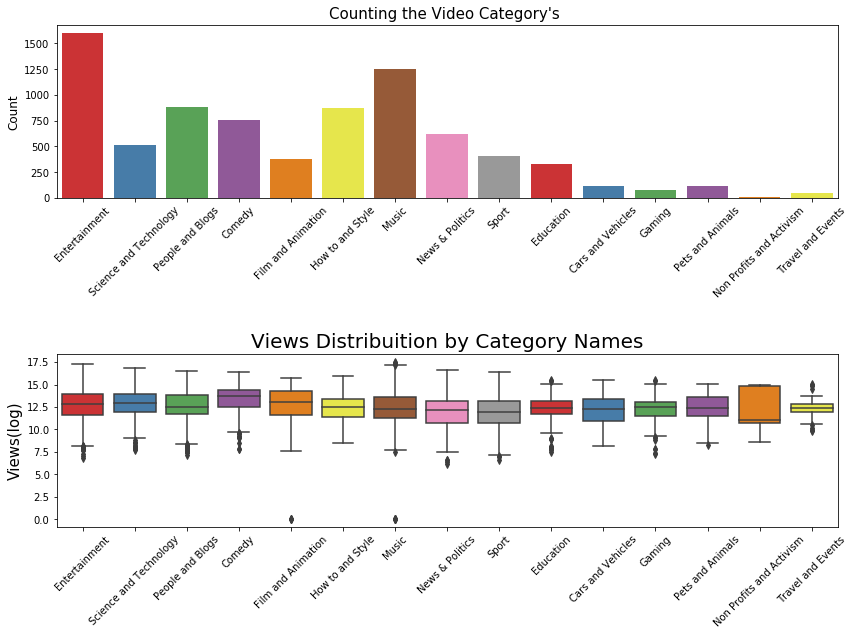

In [57]:
print("Category Name count")
print(us_vid.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=us_vid, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=us_vid, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

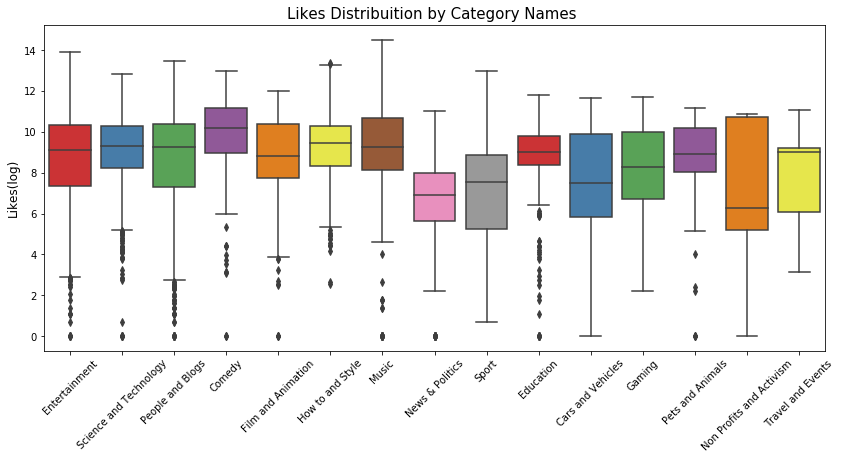

In [59]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=us_vid, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

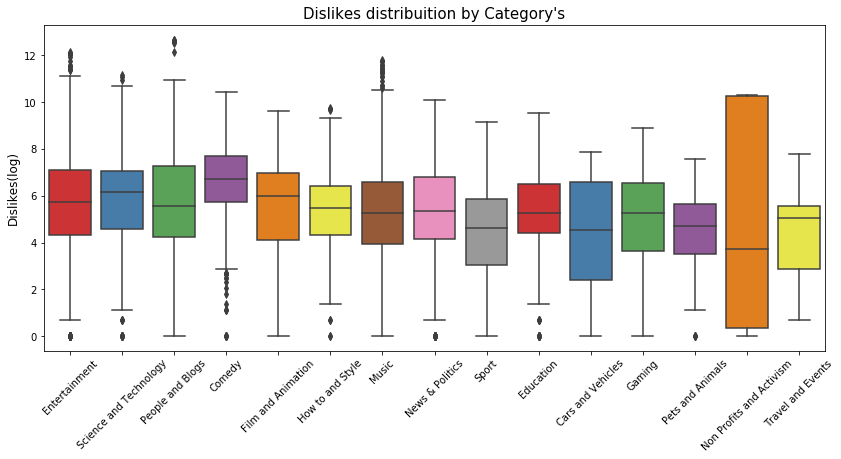

In [62]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=us_vid, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

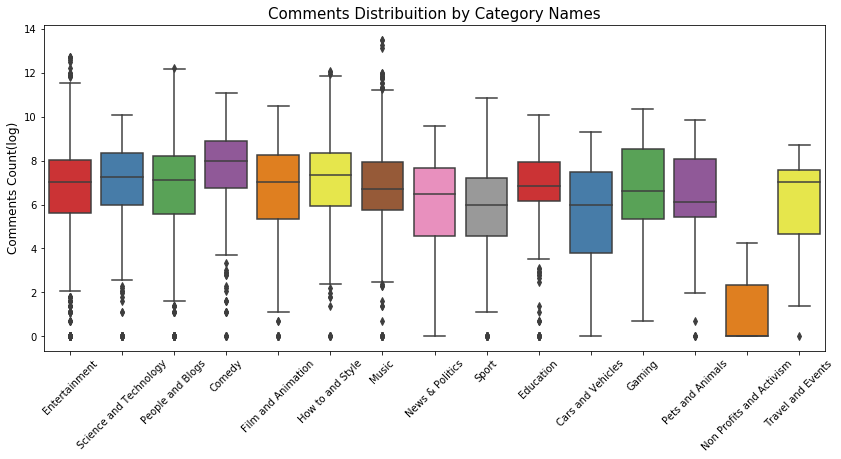

In [64]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=us_vid, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

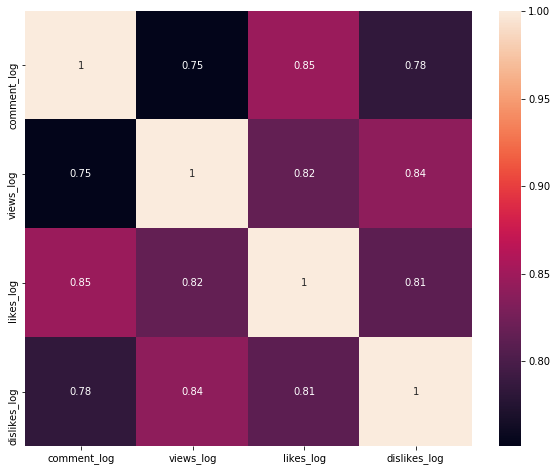

In [67]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(us_vid[['comment_log','views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()